**IMPORT LIBRARY YANG DIBUTUHKAN**

In [1]:
import numpy as np
import pandas as pd

import os

import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os

path = r"C:\Users\user\OneDrive\文档\BELAJAR DATA SCIENCE\DATA SCIENCE KSM ANDROID\project Rifqi\Credit risk modelling\Dataset"
os.chdir(path)

# Verifikasi direktori saat ini
print(os.getcwd())


C:\Users\user\OneDrive\文档\BELAJAR DATA SCIENCE\DATA SCIENCE KSM ANDROID\project Rifqi\Credit risk modelling\Dataset


In [3]:
# Check file apa saja yang ada di Directory saat ini
os.listdir()

['lc_2016_2017.csv']

In [4]:
# Membaca csv file dan melihat 5 baris pertama
loan_data = pd.read_csv('lc_2016_2017.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [5]:
# Melihat total baris dan kolom
loan_data.shape

## Total jumlah baris 759,338 dan 72 kolom

(759338, 72)

In [6]:
# Melihat info seluruh kolom
loan_data.info()

## Terdapat beberapa kolom/feature yang memiliki null values atau missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

**TARGET VARIABLE**

karena project ini untuk mengetahui bad loan & good loan, maka perlu dibuat feature baru, yaitu target variable yang merepresentasikan bad loan (sebagai 1) dan good loan (sebagai 0).

In [7]:
# Melihat unique values pada feature loan_status
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [8]:
# Membuat feature baru yaitu good_bad sebagai target variable,
# Jika loan_statusnya 'Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)' 
# akan dianggap sebagai bad_loan atau 1 dan nilai selain itu akan dianggap good loan atau 0
loan_data['good_bad'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 
                                                                   'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                , 1 , 0)

In [9]:
# Melihat distribusi 0 dan 1
loan_data.good_bad.value_counts()

good_bad
0    702875
1     56463
Name: count, dtype: int64

In [10]:
loan_data.good_bad.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

**Missing Values**

Feature yang memiliki missing values lebih dari 50% akan di drop, karena jika ingin diisi dengan nilai lain seperti median atau mean, maka errornya akan sangat tinggi. Lebih baik di drop agar tidak membuat model semakin tidak akurat.

In [11]:
# Melihat feature apa saja yang memiliki missing value lebih dari 50%
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [12]:
# Hapus kolom yang memiliki lebih dari 50% nilai NaN
loan_data.dropna(thresh=loan_data.shape[0] * 0.5, axis=1, inplace=True)


In [13]:
# Pengecheckan ulang apakah feature tersebut berhasil di drop
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


**DATA SPLITING**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Membagi data menjadi 80/20 dengan menyamakan distribusi dari bad loans di test set dengan train set.
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state=42)

In [16]:
y_train.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

In [17]:
# Distribusi y_test sudah sama persis dengan y_train
y_test.value_counts(normalize=True)

good_bad
0    0.925639
1    0.074361
Name: proportion, dtype: float64

**DATA CLEANING**

In [18]:
# Terdapat 65 kolom, bagaimana untuk mengetahui kolom apa saja yang memiliki data kotor?
X_train.shape

(607470, 65)

In [19]:
# Dapat dilakukan print untuk semua unique values kolom, sehingga dapat di cek satu-satu
# unique values apa saja yang kotor.

# for col in X_train.select_dtypes(include= ['object','bool']).columns:
#     print(col)
#     print(X_train[col].unique())
#     print()

In [20]:
# Kolom/feature yang harus di cleaning
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 
                    'next_pymnt_d', 'last_credit_pull_d']

In [21]:
# Menghilangkan ' months' menjadi ''
X_train['term'].str.replace(' months', '')

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: object

In [22]:
# Convert data type menjadi numeric 
X_train['term'] = pd.to_numeric(X_train['term'].str.replace(' months', ''))

In [23]:
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [24]:
#Terapkan juga pada x_test
# Menghilangkan ' months' menjadi ''
X_test['term'].str.replace(' months', '')

# Convert data type menjadi numeric 
X_test['term'] = pd.to_numeric(X_test['term'].str.replace(' months', ''))


X_test['term']

280647    60
419992    36
44633     36
245940    36
565744    36
          ..
70748     36
43047     60
99030     36
625689    36
267584    36
Name: term, Length: 151868, dtype: int64

In [25]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '', regex=True)
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '', regex=True)
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', '0', regex=False)
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '', regex=True)
X_train['emp_length'] = X_train['emp_length'].str.replace('\+', '', regex=True)  # Menghapus tanda '+' yang tertinggal

# Isi nilai NaN dengan 0
X_train['emp_length'].fillna(value = 0, inplace=True)

# Konversi menjadi tipe numerik
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

# Jika ada nilai yang masih NaN, bisa diisi dengan 0
X_train['emp_length'].fillna(0, inplace=True)

# Cek hasilnya
X_train['emp_length']


147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [26]:
#Lakukan yang sama pada x_test
X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '', regex=True)
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '', regex=True)
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', '0', regex=False)
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '', regex=True)
X_test['emp_length'] = X_test['emp_length'].str.replace('\+', '', regex=True)  # Menghapus tanda '+' yang tertinggal

# Isi nilai NaN dengan 0
X_test['emp_length'].fillna(value = 0, inplace=True)

# Konversi menjadi tipe numerik
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'], errors='coerce')

# Jika ada nilai yang masih NaN, bisa diisi dengan 0
X_test['emp_length'].fillna(0, inplace=True)



In [27]:
# Cek feature date
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d',
                    'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [28]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [29]:
# Check apakah berhasil di cleaning
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   term                151868 non-null  int64 
 1   emp_length          151868 non-null  int64 
 2   issue_d             151868 non-null  object
 3   earliest_cr_line    151868 non-null  object
 4   last_pymnt_d        151655 non-null  object
 5   next_pymnt_d        118276 non-null  object
 6   last_credit_pull_d  151867 non-null  object
dtypes: int64(2), object(5)
memory usage: 9.3+ MB


**FEATUTE ENGINEERING**

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((607470, 65), (607470,), (151868, 65), (151868,))

In [31]:
# Kolom yang akan di feature engineering
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [32]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [33]:
# tidak dibutuhkan untuk feature engineering
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [34]:
X_train.shape, X_test.shape

((607470, 6), (151868, 6))

In [35]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2025-02-03'

In [36]:
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    
    # Mengonversi kolom menjadi datetime, dengan menangani kesalahan konversi
    df[column] = pd.to_datetime(df[column], format="%b-%y", errors='coerce')
    
    # Menghitung selisih dalam hari dan mengonversinya ke bulan (menggunakan rata-rata 30.44 hari per bulan)
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]).dt.days / 30.44))
    
    # Menghapus kolom lama
    df.drop(columns=[column], inplace=True)

# Apply ke X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')


In [37]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [38]:
X_test.isnull().sum()

term                                  0
emp_length                            0
mths_since_earliest_cr_line      151868
mths_since_issue_d               151868
mths_since_last_pymnt_d          151868
mths_since_last_credit_pull_d    151868
dtype: int64

In [39]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

**MODELLING I**

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.925639371032739

In [46]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

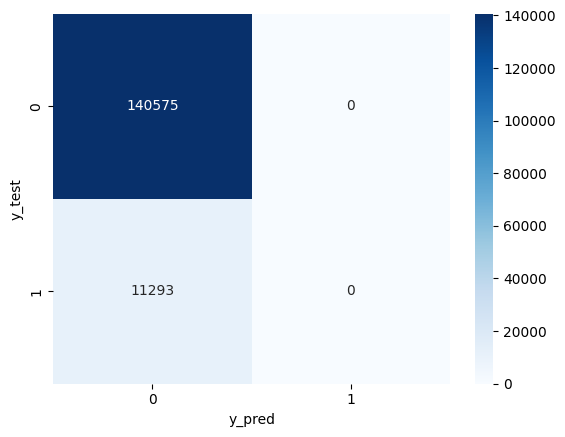

In [47]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [48]:
y_train.value_counts(normalize=True)

good_bad
0    0.925642
1    0.074358
Name: proportion, dtype: float64

**MODELLING II**

In [49]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# memprediksi probability dan mengambil probability kelas positive
y_pred = model.predict_proba(X_test)[:, 1]

In [51]:
y_pred

array([0.04578662, 0.03367528, 0.04165299, ..., 0.04165299, 0.04041136,
       0.03072693])

In [52]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

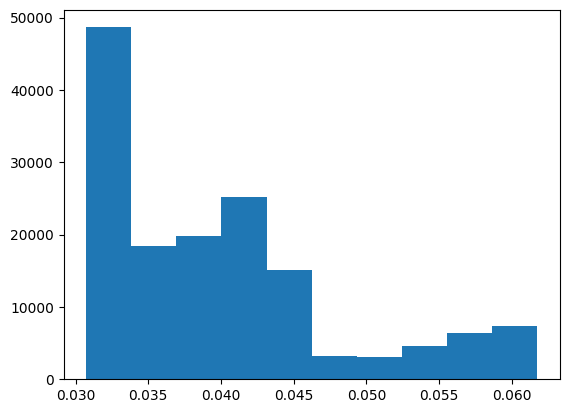

In [53]:
# distribusi predicted probability
plt.hist(y_pred);

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [55]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.041652987790574025

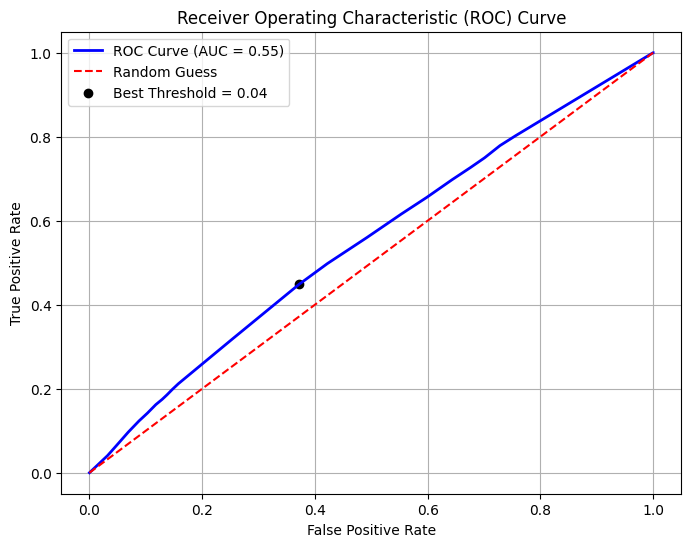

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Hitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Hitung AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label=f'Best Threshold = {best_thresh:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


In [57]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.042).astype(int)

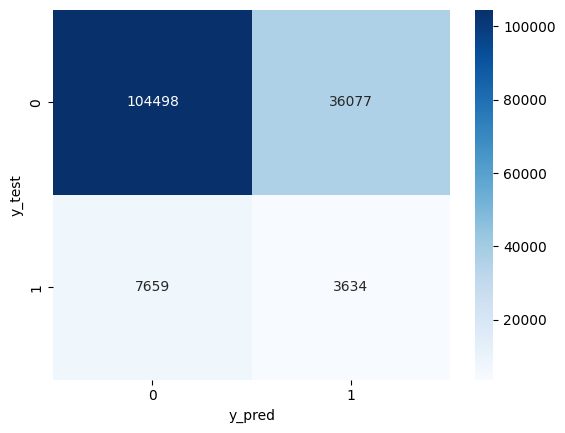

In [58]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [59]:
model.coef_

array([[ 0.01727132, -0.03155701, -0.00103483,  0.04583899,  0.23473493,
        -0.15284985]])

In [60]:
model.intercept_

array([-15.04802999])

In [61]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.017271,-0.031557,-0.001035,0.045839,0.234735,-0.15285


In [62]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,36.0,4.0,366.0,96.0,86.0,86.0
1,36.0,10.0,281.0,106.0,91.0,87.0
2,36.0,0.0,309.0,91.0,86.0,86.0
3,36.0,5.0,236.0,100.0,86.0,86.0
4,36.0,6.0,157.0,95.0,86.0,86.0
